### Imports

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import datetime
from datetime import time
from pandas.tseries.frequencies import to_offset
from numpy import array as np__array, mean as np__mean, reshape as np__reshape, sqrt as np__sqrt

from math import ceil
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

### Collecting and trabsforming data

In [4]:
# Choosing a period which we want to analyze
start_d = datetime.datetime(2000, 1, 1)
end_d = datetime.date.today()

# BA boeing company, data from Yahoo finanse
stock_d = data.DataReader('BA', 'yahoo', start_d, end_d)

# week opening
def week_open(array_like):
    return array_like[0]

# week closing
def week_close(array_like):
    return array_like[-1]

# Aplied logic: that opening day is Monday, Closing day is Friday
logic = {
                        # Open - first day (Monday) opening value
                        'Open': week_open, 
                        # High - max value of the period
                         'High': 'max',
                        # Low - min value of the period
                         'Low': 'min',
                        #  Close - last day closing value (Friday)
                         'Close': week_close,
                        #  Volume - sum of period Volume values
                         'Volume': 'sum'}

# Converting daily data to weekly with aplied logic
stock_w = stock_d.resample('W').apply(logic) 
stock_w.index -= to_offset('6D')


stock_w = stock_w[['Open', 'High', 'Low', 'Close', 'Volume']]

In [5]:
print(stock_d.head(10))
stock_w.head()

               High      Low     Open    Close     Volume  Adj Close
Date                                                                
2000-01-03  41.6875  39.8125  41.4375  40.1875  2638200.0  25.940281
2000-01-04  41.1250  39.7500  40.1875  40.1250  3592100.0  25.899940
2000-01-05  43.3125  41.3750  41.3750  42.6250  7631700.0  27.513651
2000-01-06  43.4375  41.1250  42.6250  43.0625  4922200.0  27.796041
2000-01-07  44.8750  43.6875  43.6875  44.3125  6008300.0  28.602900
2000-01-10  44.5000  43.5000  44.3125  43.6875  2403500.0  28.199463
2000-01-11  43.9375  42.7500  43.6875  42.8750  2450000.0  27.675013
2000-01-12  44.1875  42.5000  42.8750  43.0625  2327800.0  27.796041
2000-01-13  43.3750  42.0000  43.0625  42.3750  3035100.0  27.352276
2000-01-14  44.2500  42.9375  42.9375  44.0000  3834900.0  28.401182


,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03,41.4375,44.8750,39.7500,44.3125,24792500.0
2000-01-10,44.3125,44.5000,42.0000,44.0000,14051300.0
2000-01-17,44.0000,48.1250,43.1250,45.6875,30657000.0
2000-01-24,45.6875,46.8750,43.6250,44.6250,17080700.0
2000-01-31,44.5625,45.1875,42.5625,44.0000,14199400.0


In [6]:
stock_w.shape

(1171, 5)

### Simple testing

In [8]:
# Volume
first_week_volume = stock_d['Volume'][0:5].sum()
first_week_volume_rsh = stock_w.Volume[0]

# Close
first_week_close = stock_d['Close'][4]
first_week_close_rsh = stock_w['Close'][0]

# Low
first_week_low = stock_d['Low'][0:5].min()
first_week_low_rsh = stock_w['Low'][0]

# High
first_week_high = stock_d['High'][0:5].max()
first_week_high_rsh = stock_w['High'][0]

# Open
first_week_open = stock_d['Open'][0]
first_week_open_rsh = stock_w['Open'][0]


In [9]:
print(f'First week volume sum is correct? {first_week_volume == first_week_volume_rsh}')
print(f'First week close price is correct? {first_week_close == first_week_close_rsh}')
print(f'First week low price is correct? {first_week_low == first_week_low_rsh}')
print(f'First week high price is correct? {first_week_high == first_week_high_rsh}')
print(f'First week open price is correct? {first_week_open == first_week_open_rsh}')

First week volume sum is correct? True
First week close price is correct? True
First week low price is correct? True
First week high price is correct? True
First week open price is correct? True


### Analyse the Data

In [68]:
stock_w.describe

<bound method NDFrame.describe of                   Open        High         Low       Close      Volume
Date                                                                  
2000-01-03   41.437500   44.875000   39.750000   44.312500  24792500.0
2000-01-10   44.312500   44.500000   42.000000   44.000000  14051300.0
2000-01-17   44.000000   48.125000   43.125000   45.687500  30657000.0
2000-01-24   45.687500   46.875000   43.625000   44.625000  17080700.0
2000-01-31   44.562500   45.187500   42.562500   44.000000  14199400.0
...                ...         ...         ...         ...         ...
2022-05-09  146.000000  146.949997  120.279999  127.199997  72546400.0
2022-05-16  127.050003  132.830002  117.080002  120.699997  59251400.0
2022-05-23  121.699997  132.229996  117.290001  132.229996  41737200.0
2022-05-30  131.029999  140.699997  127.010002  139.250000  40807300.0
2022-06-06  139.990005  142.210007  126.849998  127.000000  31405400.0

[1171 rows x 5 columns]>

In [ ]:
#Visialization the data
plt.figure(figsize=(16,8))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5, label = 'Train')
plt.plot(valid['Close'],linewidth=3.5, label = 'Valid')
plt.plot(valid['Predictions'],linewidth=3.5, label = 'Predictions')
plt.legend()
plt.show()

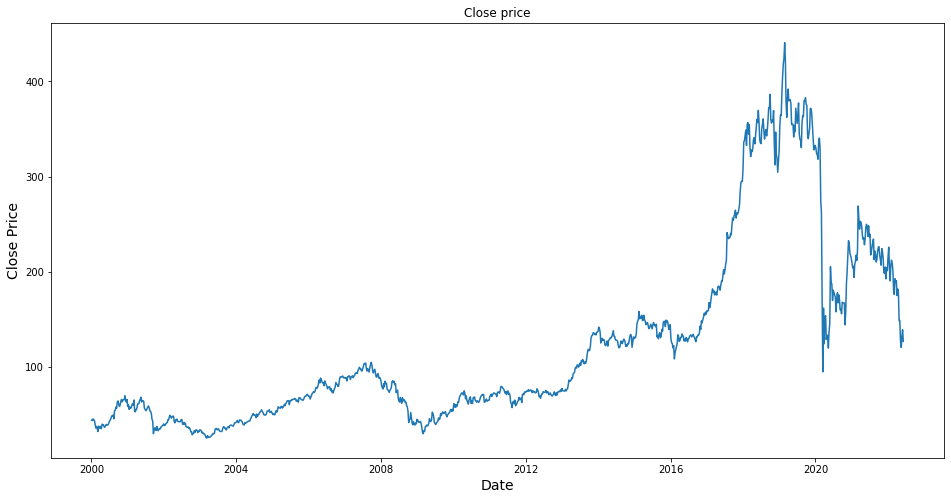

In [71]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price' ,fontsize=14)
plt.plot(stock_w.Close)
plt.show()

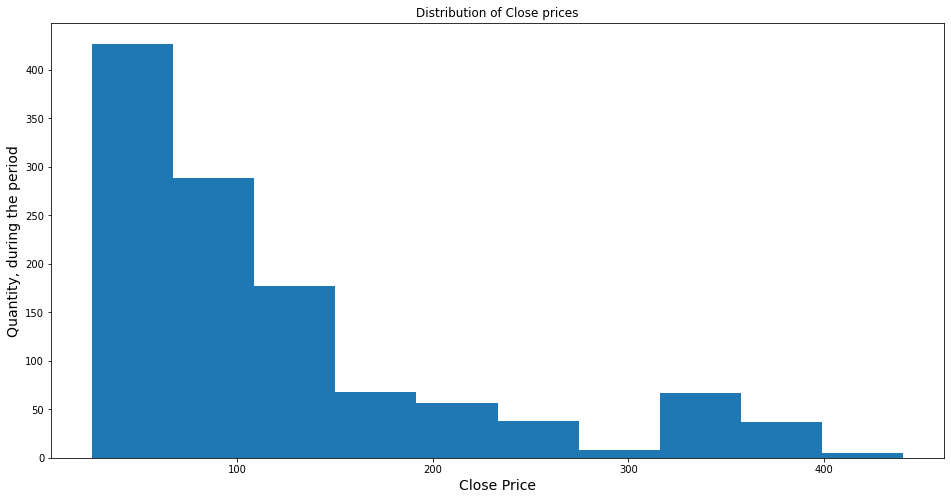

In [73]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.hist(stock_w.Close)
plt.ylabel('Quantity, during the period', fontsize=14)
plt.xlabel('Close Price' ,fontsize=14)
plt.title('Distribution of Close prices')
plt.show()

### Building the LSTM model

LSTM model is chosen to accurately analyze and predict the future stock values. One of the most well-known networks for series forecasting is LSTM (long short-term memory) which is a Recurrent Neural Network (RNN) that is able to remember information over a long period of time and making them extremely useful for predicting stock prices. RNNs are suits great to time series data and they are able to process the data step-by-step (as a query), maintaining an internal state where they cache the information they have seen so far in a summarised version. The successful prediction of a stock's future price could yield a significant profit.

In [16]:
# create a new data frame with only 'Close column'
data = stock_w.filter(['Close'])
dataset = data.values #convert the data frame to a numpy array
training_data_len = math.ceil(len(dataset)*.8)  # number of rows to train the model on
training_data_len

937

In [19]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.04520322],
       [0.04445034],
       [0.04851592],
       ...,
       [0.25701688],
       [0.2739297 ],
       [0.24441661]])

In [20]:
#create the training dataset
#create the scaled training dataset

train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train, y_train datasets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.04520322, 0.04445034, 0.04851592, 0.04595611, 0.04445034,
       0.03451225, 0.02517648, 0.02954321, 0.0250259 , 0.01644301,
       0.02999494, 0.02517648, 0.02954321, 0.02442359, 0.02367071,
       0.03496398, 0.03406052, 0.03360879, 0.02803744, 0.02743513,
       0.03059725, 0.03451225, 0.03285591, 0.03300648, 0.03451225,
       0.03918014, 0.04384803, 0.04550438, 0.0512263 , 0.05604477,
       0.0564965 , 0.05800227, 0.04851592, 0.06884381, 0.07034958,
       0.07848074, 0.0754692 , 0.09143036, 0.0938396 , 0.08540728,
       0.07998651, 0.08299805, 0.09203267, 0.09760402, 0.09143036,
       0.09594767, 0.09670056, 0.09700171, 0.1069398 , 0.09474306,
       0.09127979, 0.09745344, 0.07998651, 0.08450382, 0.07260824,
       0.07833016, 0.07540897, 0.07658949, 0.08297396, 0.08687692])]
[0.08323897072781589]



In [21]:
#convert the x_train and y_train  to numppy array
x_train,y_train = np.array(x_train), np.array(y_train)

In [22]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(877, 60, 1)

In [25]:
#Buil the LSTM model
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [28]:
#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')

### Training

In [29]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
877/877 [==============================] - 17s 16ms/step - loss: 0.0010
Epoch 2/10
877/877 [==============================] - 14s 16ms/step - loss: 3.8516e-04
Epoch 3/10
877/877 [==============================] - 16s 18ms/step - loss: 3.5418e-04
Epoch 4/10
877/877 [==============================] - 17s 19ms/step - loss: 3.6741e-04
Epoch 5/10
877/877 [==============================] - 17s 19ms/step - loss: 1.9218e-04
Epoch 6/10
877/877 [==============================] - 17s 19ms/step - loss: 6.1566e-04
Epoch 7/10
877/877 [==============================] - 18s 20ms/step - loss: 3.4260e-04
Epoch 8/10
877/877 [==============================] - 17s 20ms/step - loss: 1.6453e-04
Epoch 9/10
877/877 [==============================] - 18s 20ms/step - loss: 1.4322e-04
Epoch 10/10
877/877 [==============================] - 18s 20ms/step - loss: 1.7328e-04


In [30]:
#create the testing data sets
#create a new array containing scale values
test_data= scaled_data[training_data_len-60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [31]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [32]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(234, 60, 1)

### Predicting

In [33]:
#predicting the data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [34]:
#get the root mean square error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.4944581577920506

In this example, we reach a validation loss of 1.73% with an RMSE (Mean Square Error) of 0.49% which is relatively good, providing us with a very accurate result.

In [65]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

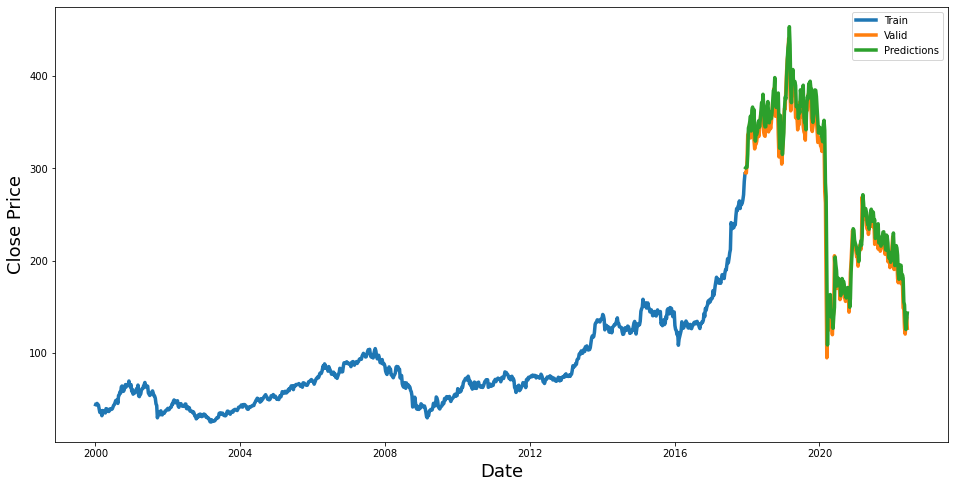

In [67]:
#Visialization the data
plt.figure(figsize=(16,8))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5, label = 'Train')
plt.plot(valid['Close'],linewidth=3.5, label = 'Valid')
plt.plot(valid['Predictions'],linewidth=3.5, label = 'Predictions')
plt.legend()
plt.show()

### Let's compare validationa and predicted results

In [36]:
#show the valid and predicted price
valid

,Close,Predictions
Date,,
2017-12-18,295.100006,290.962646
2017-12-25,294.910004,293.357697
2018-01-01,308.839996,292.719788
2018-01-08,336.209991,303.040436
2018-01-15,337.730011,327.733124
...,...,...
2022-05-09,127.199997,149.957275
2022-05-16,120.699997,133.615570
2022-05-23,132.229996,124.509415
